In [2]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "Impact_of_Remote_Work_on_Mental_Health.csv."
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Creating a LabelEncoder instance
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    "Gender", "Job_Role", "Industry", "Work_Location", "Stress_Level",
    "Mental_Health_Condition", "Access_to_Mental_Health_Resources", "Productivity_Change",
    "Satisfaction_with_Remote_Work", "Physical_Activity", "Sleep_Quality", "Region"
]

# Encoding categorical features
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Display the updated DataFrame
print(df.head())


  Employee_ID  Age  Gender  Job_Role  Industry  Years_of_Experience  \
0     EMP0001   32       2         2         3                   13   
1     EMP0002   40       0         0         4                    3   
2     EMP0003   59       2         6         1                   22   
3     EMP0004   27       1         6         2                   20   
4     EMP0005   49       1         5         0                   32   

   Work_Location  Hours_Worked_Per_Week  Number_of_Virtual_Meetings  \
0              0                     47                           7   
1              2                     52                           4   
2              0                     46                          11   
3              1                     32                           8   
4              1                     35                          12   

   Work_Life_Balance_Rating  Stress_Level  Mental_Health_Condition  \
0                         2             2                        2   
1     

In [8]:
# Splitting data into Features and Target variable
X = df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 
        'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']]
y = df['Employee_ID']  # Ensure Employee_ID is the correct target variable

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3500, 7)
X_test shape: (1500, 7)
y_train shape: (3500,)
y_test shape: (1500,)


In [16]:
# 1. Check dependent and independent variables
print("Step 1: Variable Information")
print("\nDependent Variable (Target):")
print("Access_to_Mental_Health_Resources")
print("\nIndependent Variables (Features):")
print(df.columns.drop('Access_to_Mental_Health_Resources').tolist())

Step 1: Variable Information

Dependent Variable (Target):
Access_to_Mental_Health_Resources

Independent Variables (Features):
['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']


In [17]:
# 3. Divide data into independent and dependent variables
features = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 
        'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']

X = df[features]
y = df['Access_to_Mental_Health_Resources']

print("\nStep 3: Data Division")
print("Independent variables shape:", X.shape)
print("Dependent variable shape:", y.shape)

#The dataset has been successfully split into features (X) and target (y).
#The number of records in both is the same (499), ensuring no data loss.
#The dependent variable is one-dimensional, confirming that this is a binary classification problem (Access_to_Mental_Health_Resources vs. No Access_to_Mental_Health_Resources).


Step 3: Data Division
Independent variables shape: (5000, 7)
Dependent variable shape: (5000,)


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)   

In [23]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                   max_iter=200)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.79271771
Iteration 2, loss = 0.70806397
Iteration 3, loss = 0.69634218
Iteration 4, loss = 0.69413357
Iteration 5, loss = 0.69340145
Iteration 6, loss = 0.69293895
Iteration 7, loss = 0.69269863
Iteration 8, loss = 0.69227241
Iteration 9, loss = 0.69184688
Iteration 10, loss = 0.69139192
Iteration 11, loss = 0.69102439
Iteration 12, loss = 0.69081818
Iteration 13, loss = 0.69045553
Iteration 14, loss = 0.68994802
Iteration 15, loss = 0.68981503
Iteration 16, loss = 0.68932659
Iteration 17, loss = 0.68921116
Iteration 18, loss = 0.68893945
Iteration 19, loss = 0.68858631
Iteration 20, loss = 0.68818551
Iteration 21, loss = 0.68794663
Iteration 22, loss = 0.68758193
Iteration 23, loss = 0.68706094
Iteration 24, loss = 0.68664497
Iteration 25, loss = 0.68590873
Iteration 26, loss = 0.68592461
Iteration 27, loss = 0.68555685
Iteration 28, loss = 0.68463016
Iteration 29, loss = 0.68411240
Iteration 30, loss = 0.68354475
Iteration 31, loss = 0.68294737
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

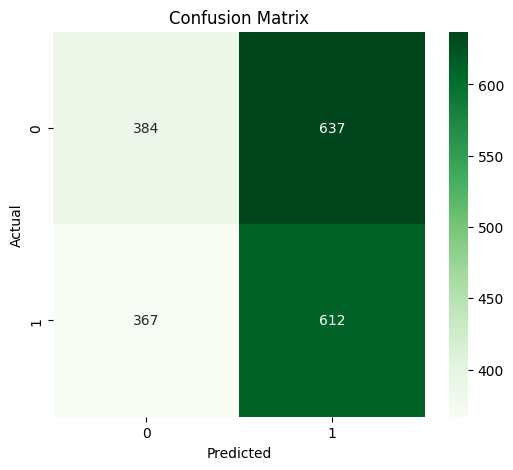

In [25]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for visualization
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

# Making prediction
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Ensure correct order: (y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43      1021
           1       0.49      0.63      0.55       979

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



In [27]:
 from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4980


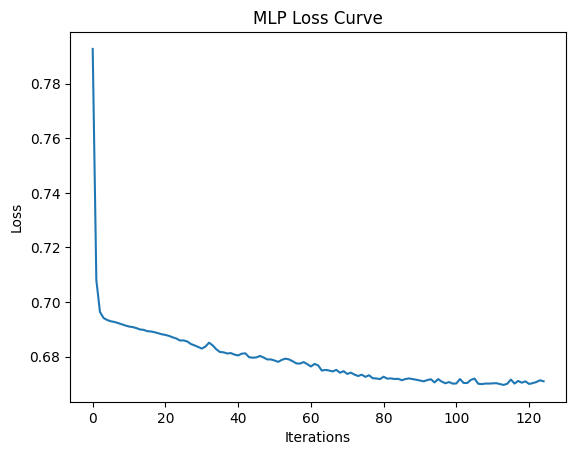

In [28]:
# Plot loss curve
plt.plot(clf.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Loss Curve')
plt.show()

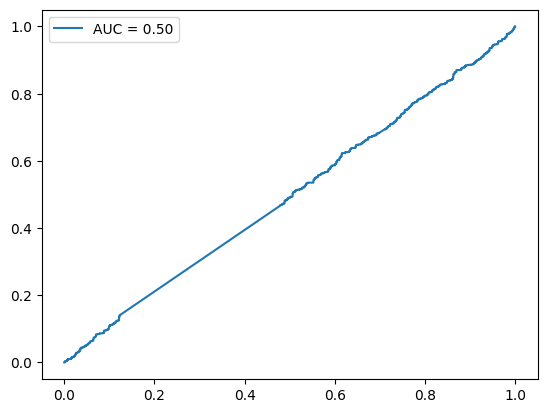

In [29]:
from sklearn.metrics import roc_curve, auc
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.legend()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (modify this based on your actual data source)
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv") 

# Define features (X) and target (y)
X = df.drop(columns=["Access_to_Mental_Health_Resources"])
y = df["Access_to_Mental_Health_Resources"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
y_predd = best_mlp.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_predd))
print("Classification Report:\n", classification_report(y_test, y_pred))

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.